In [13]:
!pip install yfinance
!pip install prophet

In [14]:
import yfinance as yf

apple = "AAPL" 

start = "2018-1-1"
end = "2023-12-31"

data = yf.download(apple, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [15]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670971,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663902,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852783,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317898,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164425,82271200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [16]:
import pandas as pd
data.reset_index(inplace=True)  # Нулиране на индекса, за да стане 'Date' колона
print(data.columns)
data = data[["Date","Close"]]
data.columns = ["ds","y"]
data

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,ds,y
0,2018-01-02,43.064999
1,2018-01-03,43.057499
2,2018-01-04,43.257500
3,2018-01-05,43.750000
4,2018-01-08,43.587502
...,...,...
1504,2023-12-22,193.600006
1505,2023-12-26,193.050003
1506,2023-12-27,193.149994
1507,2023-12-28,193.580002


In [17]:
train_data = data[(data['ds'] >= '2018-01-01') & (data['ds'] <= '2022-12-31')]
test_data = data[(data['ds'] >= '2023-01-01') & (data['ds'] <= '2023-12-31')]

In [18]:
import io, os, sys, setuptools, tokenize
from prophet import Prophet
p = Prophet(daily_seasonality=True)
p.fit(train_data)
future = p.make_future_dataframe(periods=365)
data_forecast = p.predict(future)

08:40:19 - cmdstanpy - INFO - Chain [1] start processing
08:40:19 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
data_forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'daily', 'weekly', 'yearly',]].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,daily,weekly,yearly
1619,2023-12-26,116.215132,89.133738,141.349708,116.052991,-1.966094,0.021451,2.106784
1620,2023-12-27,116.271463,89.560549,143.194616,115.978575,-1.966094,0.038476,2.220505
1621,2023-12-28,116.124967,89.254315,144.132854,115.904159,-1.966094,-0.152506,2.339407
1622,2023-12-29,115.999898,88.285723,142.590927,115.829744,-1.966094,-0.324999,2.461248
1623,2023-12-30,116.618686,90.052105,143.096903,115.755328,-1.966094,0.245761,2.583691


D:\JN\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



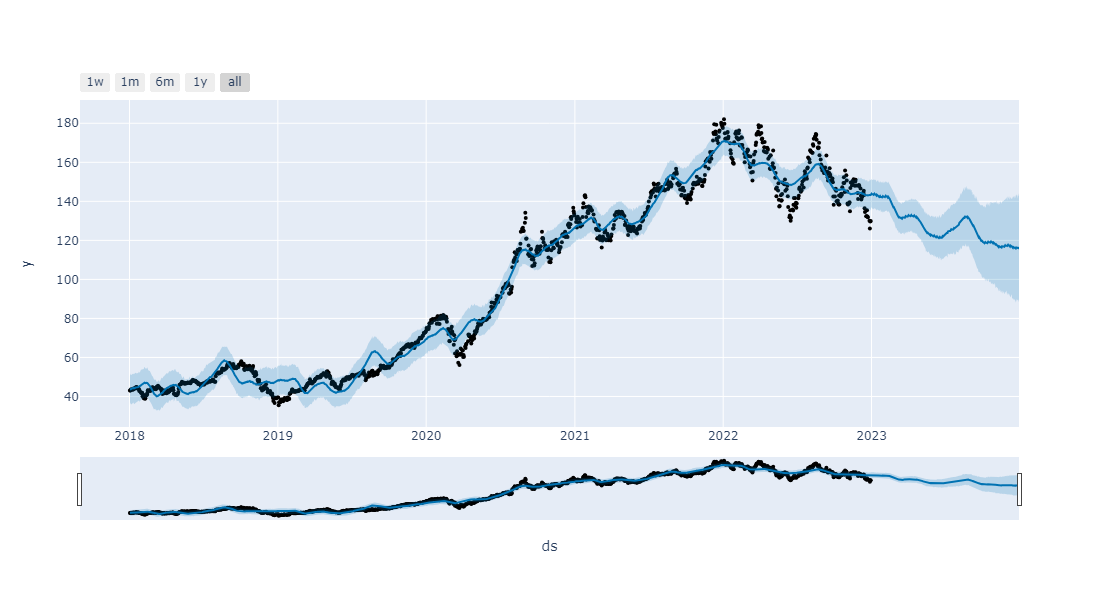

In [20]:
from prophet.plot import plot_plotly
plot_plotly(p, data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future

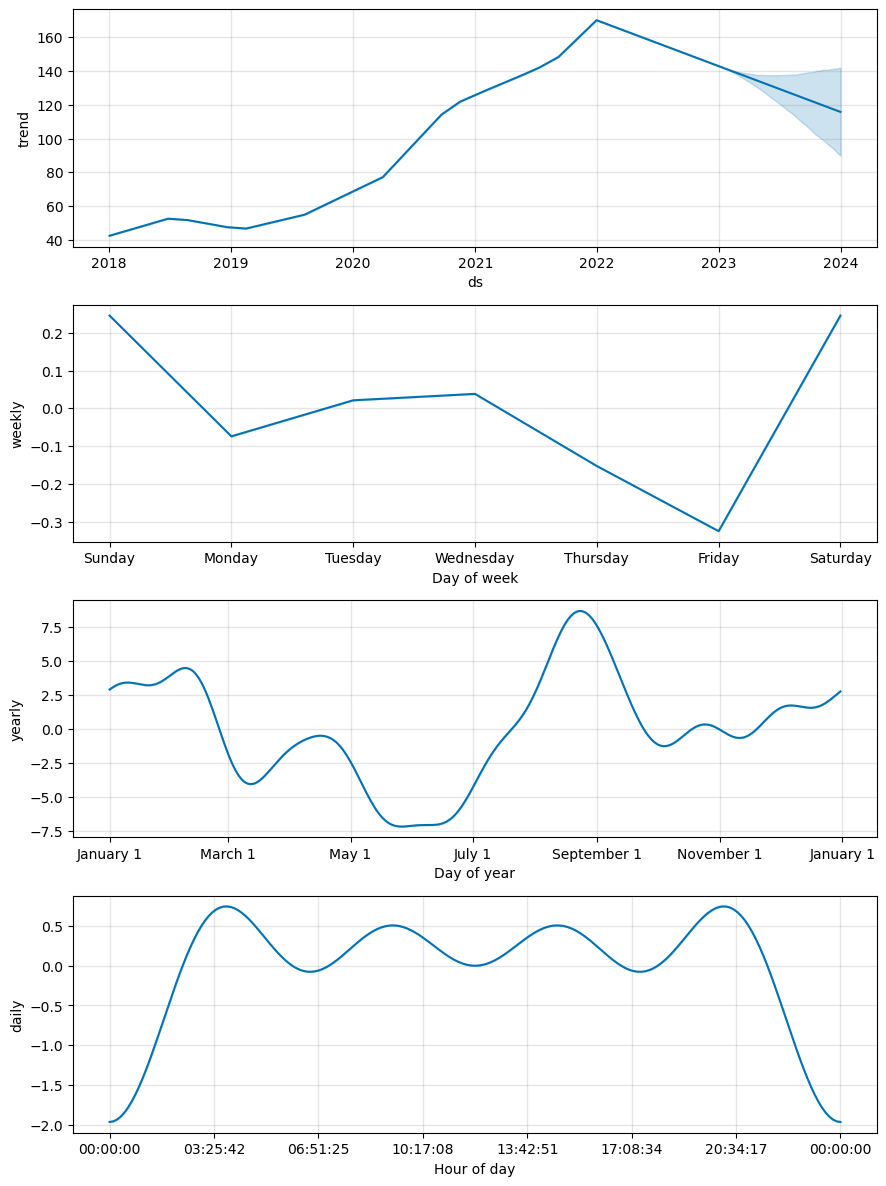

In [21]:
tesla_data_plot = p.plot_components(data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



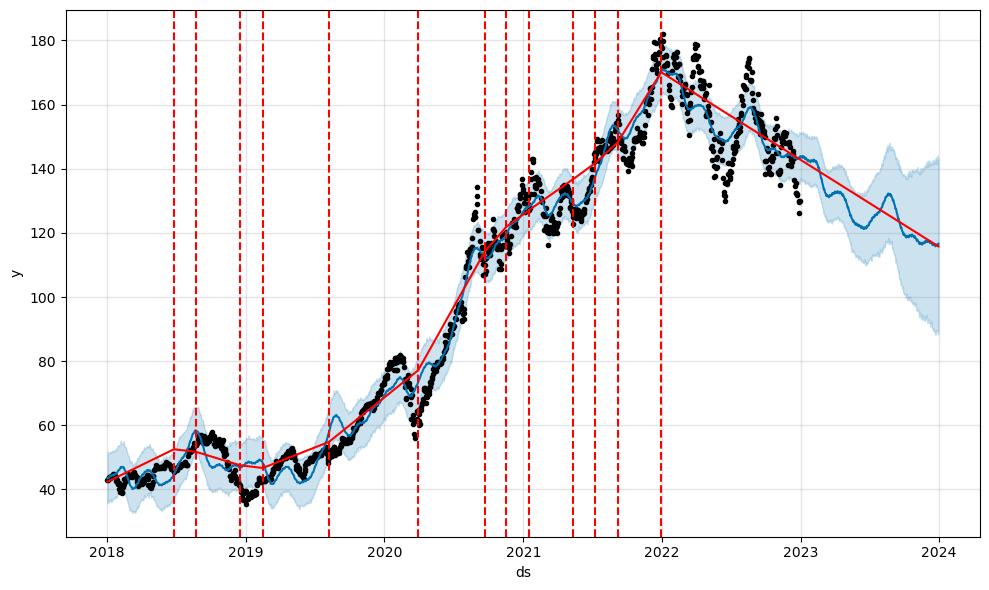

In [22]:
from prophet.plot import add_changepoints_to_plot
fig = p.plot(data_forecast)
a = add_changepoints_to_plot(fig.gca(), p, data_forecast)

<Axes: xlabel='ds'>

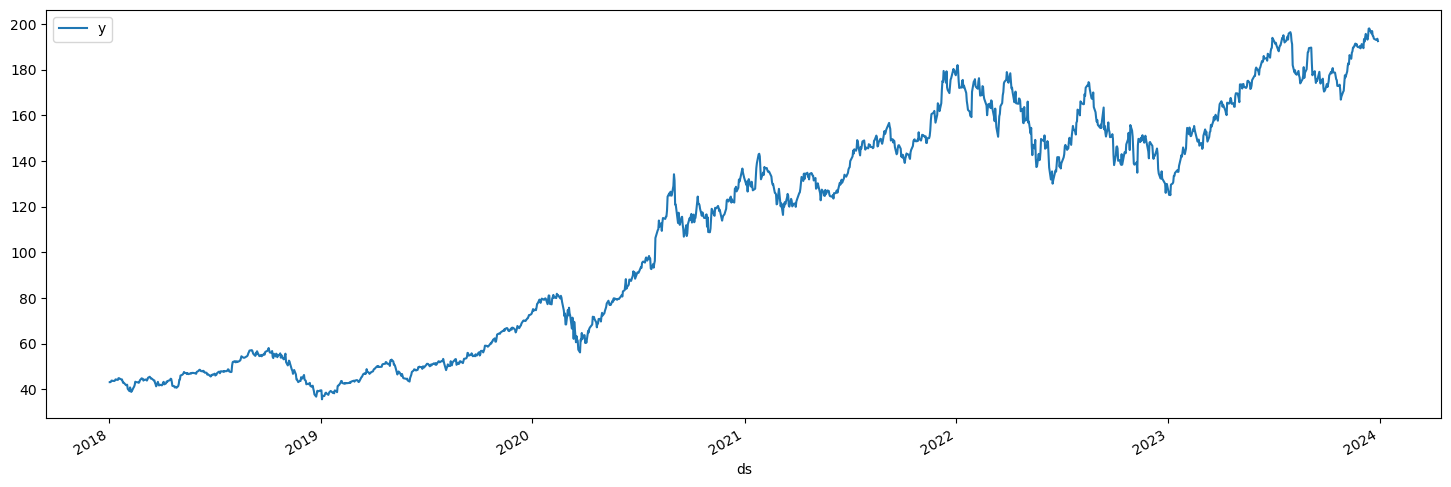

In [23]:
data.plot(x='ds',y='y',figsize=(18,6))

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [25]:
test_forecast = data_forecast[(data_forecast['ds'] >= '2023-01-01') & (data_forecast['ds'] <= '2023-12-31')]
test_forecast = test_forecast[test_forecast['ds'].isin(test_data['ds'])]

rmse = mean_squared_error(test_data['y'], test_forecast['yhat'], squared=False)
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
mape = np.mean(np.abs((test_data['y'] - test_forecast['yhat']) / test_data['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 51.61573453559756
MAE: 46.63019016992799
MAPE: 23.90094046155743


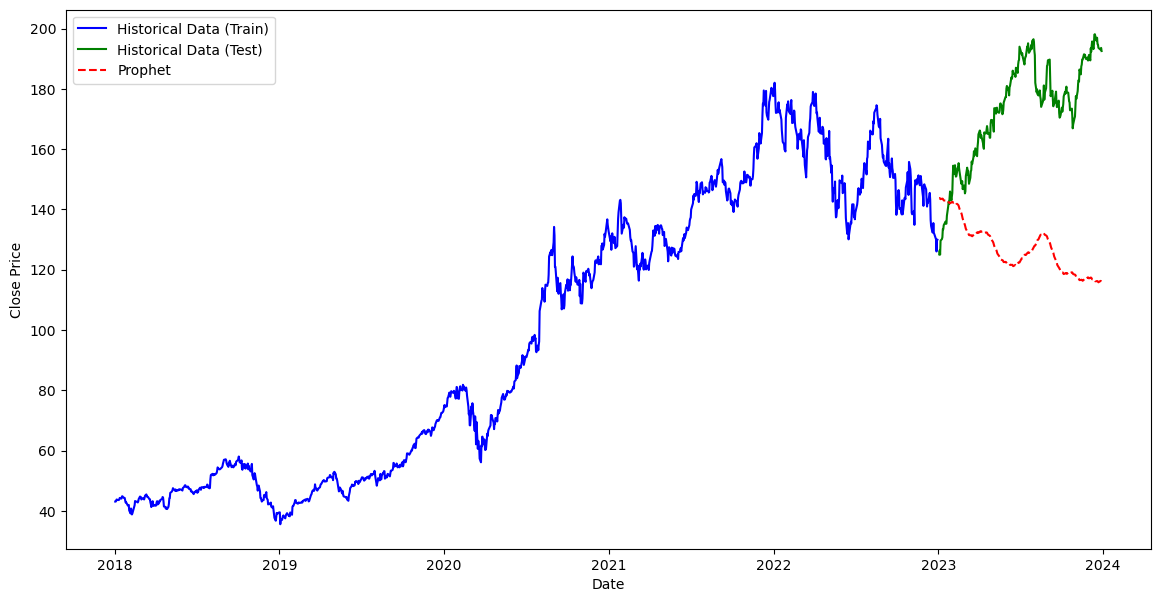

In [26]:
import matplotlib.pyplot as plt

# Визуализация на историческите данни и прогнозата
plt.figure(figsize=(14, 7))
plt.plot(train_data['ds'], train_data['y'], label='Historical Data (Train)', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Historical Data (Test)', color='green')
plt.plot(test_data['ds'], test_forecast['yhat'], label='Prophet', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
